# Outlier

## Import Libraries

In [93]:
import pandas as pd

## Import Data

In [94]:
train = pd.read_csv('train_regression.csv')

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Partition Data into X and y

In [96]:
y = train['SalePrice']
X = train.drop(['SalePrice','Id'], axis =  1)

## Get Numerical and Categorical Column Names

In [97]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.tolist()
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [98]:
categorical_features = X.select_dtypes(exclude = ['int64','float64']).columns.tolist()
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Treat Missing Values

In [99]:
from sklearn.impute import SimpleImputer

num_impute = SimpleImputer(strategy = 'median')
num_impute.fit(X[numerical_features])
X[numerical_features] = num_impute.transform(X[numerical_features])

cat_impute = SimpleImputer(strategy = 'constant', fill_value = 'missing')
cat_impute.fit(X[categorical_features])
X[categorical_features] = cat_impute.transform(X[categorical_features])

# Outlier Strategy

## 1/ Check Outliers

In [100]:
X[numerical_features[2:6]]

,LotArea,OverallQual,OverallCond,YearBuilt
0,8450.0,7.0,5.0,2003.0
1,9600.0,6.0,8.0,1976.0
2,11250.0,7.0,5.0,2001.0
3,9550.0,7.0,5.0,1915.0
4,14260.0,8.0,5.0,2000.0
...,...,...,...,...
1455,7917.0,6.0,5.0,1999.0
1456,13175.0,6.0,6.0,1978.0
1457,9042.0,7.0,9.0,1941.0
1458,9717.0,5.0,6.0,1950.0


In [101]:
X[numerical_features[2:4]].describe()

,LotArea,OverallQual
count,1460.000000,1460.000000
mean,10516.828082,6.099315
std,9981.264932,1.382997
min,1300.000000,1.000000
25%,7553.500000,5.000000
50%,9478.500000,6.000000
75%,11601.500000,7.000000
max,215245.000000,10.000000


<AxesSubplot:>

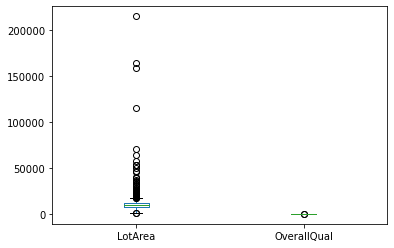

In [102]:
X[numerical_features[2:4]].plot.box()

## 2/ Treat One Column

In [103]:
X[numerical_features[2:4]].columns.tolist()

['LotArea', 'OverallQual']

In [104]:
#num_var = 'LotArea'

In [105]:
Q1 = train['LotArea'].quantile(0.25)
Q3 = train['LotArea'].quantile(0.75)

print(Q1)
print(Q3)

7553.5
11601.5


In [106]:
IQR = Q3-Q1

print(IQR)

4048.0


In [107]:
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print(Lower_Whisker)
print(Upper_Whisker)

1481.5
17673.5


In [108]:
X['LotArea'] = X['LotArea'].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
X['LotArea'] = X['LotArea'].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

## 2.1/ Check One Feature

<AxesSubplot:>

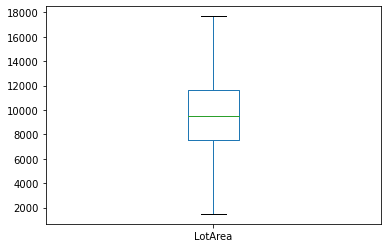

In [109]:
X['LotArea'].plot.box()

## 3/ Treat all columns

In [110]:
for num_var in numerical_features:
  Q1 = X[num_var].quantile(0.25)
  Q3 = X[num_var].quantile(0.75)

  IQR = Q3-Q1

  Lower_Whisker = Q1 - 1.5*IQR
  Upper_Whisker = Q3 + 1.5*IQR

  X[num_var] = X[num_var].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
  X[num_var] = X[num_var].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)

## 4/ Check

In [111]:
X[numerical_features[2:4]].describe()

,LotArea,OverallQual
count,1460.000000,1460.000000
mean,9647.388014,6.100685
std,3594.356399,1.378430
min,1481.500000,2.000000
25%,7553.500000,5.000000
50%,9478.500000,6.000000
75%,11601.500000,7.000000
max,17673.500000,10.000000


In [112]:
X[numerical_features[2:4]].head()

,LotArea,OverallQual
0,8450.0,7.0
1,9600.0,6.0
2,11250.0,7.0
3,9550.0,7.0
4,14260.0,8.0


<AxesSubplot:>

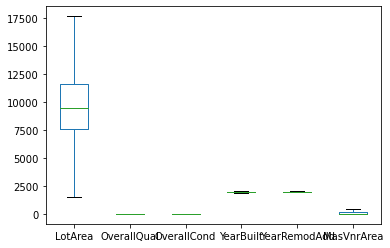

In [114]:
X[numerical_features[2:8]].plot.box()